In [89]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [90]:
data = pd.read_excel('1May.xlsx')
print("Read the source excel")

Read the source excel


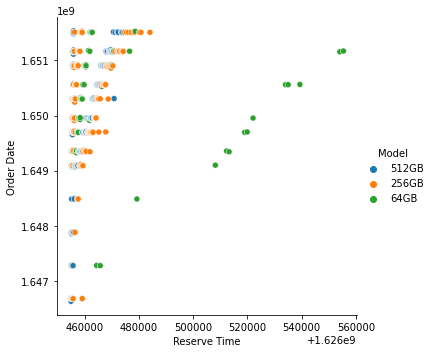

In [91]:
import seaborn as sns

sns.relplot(x="Reserve Time", y="Order Date", hue="Model", data=data)

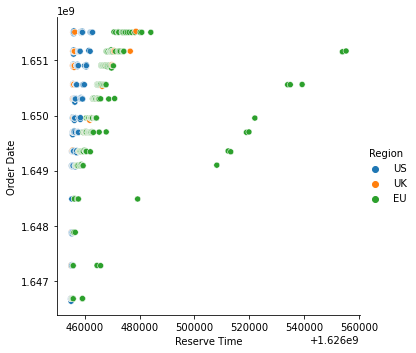

In [92]:
import seaborn as sns

sns.relplot(x="Reserve Time", y="Order Date", hue="Region", data=data)

In [93]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [94]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()
data["Region"] = ordinal_enc.fit_transform(data[["Region"]])
data["Quarter"] = ordinal_enc.fit_transform(data[["Quarter"]])
data["Model"] = ordinal_enc.fit_transform(data[["Model"]])
print("Ordinal Encode Category Columns")

Ordinal Encode Category Columns


In [95]:
y = data.iloc[:, -1]

X = data.iloc[:, 0:4]
X

,Region,Model,Reserve Time,Quarter
0,2.0,1.0,1626454855,0.0
1,2.0,1.0,1626454855,0.0
2,2.0,1.0,1626454966,0.0
3,1.0,1.0,1626454970,0.0
4,1.0,1.0,1626454989,0.0
...,...,...,...,...
867,0.0,2.0,1626534019,1.0
868,0.0,2.0,1626534980,1.0
869,0.0,2.0,1626539305,1.0
870,0.0,2.0,1626554015,1.0


In [96]:
#Do a test train split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=42)
print("Test Train Split")

Test Train Split


In [97]:
#use linear regression to train the model and score the accuracy of the model
model = LinearRegression().fit(X, y)
r_sq = model.score(X_valid, y_valid)
print(r_sq * 100)

48.26490563533159


In [98]:
#Region	Model	Timestamp	ValveEstimate
d = {'Region': 2.0, 'Model': 2.0, "Reserve Time": 1626462349, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])

res  = model.predict(df)
print("{0:.0f}".format(res[0]))


1650376546


In [71]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

my_pipeline = XGBRegressor()

my_pipeline.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [72]:
r_sq = my_pipeline.score(X_valid, y_valid.values.ravel())
print(r_sq * 100)

96.93369016975217


In [73]:
from sklearn.metrics import mean_absolute_error

preds = my_pipeline.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

105170.29142857142


In [74]:
#Region	Model	Timestamp	ValveEstimate
d = {'Region': 2.0, 'Model': 2.0, "Reserve Time": 1626462349, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])

res  = my_pipeline.predict(df)
print("{0:.0f}".format(res[0]))

1651749248


In [35]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=1)

regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=1)

In [36]:
r_sq = regr.score(X_valid, y_valid.values.ravel())
print(r_sq * 100)

46.57289677722888


In [38]:
d = {'Region': 2.0, 'Model': 0.0, "Reserve Time": 1626461964, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])

res  = regr.predict(df)
print("{0:.0f}".format(res[0]))

1650222075


In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_t = sc_X.fit_transform(X_train)
y_tr = y_train.values.ravel().reshape(-1,1)
y_t = sc_y.fit_transform(y_tr)


X_v = sc_X.fit_transform(X_valid)
y_va = y_valid.values.ravel().reshape(-1,1)
y_v = sc_y.fit_transform(y_va)

In [40]:
from sklearn.svm import SVR

regressor = SVR(kernel='linear')
regressor.fit(X_t, y_t.ravel())

SVR(kernel='linear')

In [41]:
r_sq = regressor.score(X_v, y_v)
print(r_sq * 100)

13.987607236887845


In [42]:
d = {'Region': 2.0, 'Model': 0.0, "Reserve Time": 1626461964, "Quarter": 1.0}
df = pd.DataFrame(data=d, index=[0])
dx = sc_X.fit_transform(df)
res  = regressor.predict(df)
print("{0:.0f}".format(res[0]))

1332770477
